### Supervised Learning - Linear Regression

#### Data Overview

- `mpg` MPG (miles per gallon)
- `cylinders` # of cylinders
- `displacement` engine displacement (cu. inches)
- `horsepower` horsepower
- `weight` vehicle weight (lbs.)
- `acceleration` time to accelerate from O to 60 mph (sec.),
- `model year` model year (modulo 100)
- `origin` origin of car (1. American, 2. European,3. Japanese).

#### **Key Items Covered**

- Exploratory Data Analysis
    - Bivariate Plots, pair plots, heap maps
- Data Preprocessing Pipeline
    - Creating Dummy Variable
    - Missing Value Treatment
- Linear Regression
    - Define X and y feature
    - Train and Test Split
    - LinearRegression
    - Get Coefficients and intercepts
    - Polynomial Features - `sklearn.preprocessing - PolynomialFeatures`
- Evaluation 
    - R2 Score

#### Import Libraries

In [1]:
import numpy as np   
import pandas as pd    

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression # Sklearn package's linear regression model
from sklearn.metrics import mean_squared_error, r2_score # Sklearn package's metrics for evaluating

import warnings
warnings.filterwarnings('ignore')

**Imp Note:** *Train test split is the process of dividing a dataset into training and testing subsets. The training set is used to train a machine learning model, while the testing set is used to evaluate its performance*

#### Load and review data

In [2]:
auto = pd.read_csv("data/11_auto-mpg.csv")  

print(f'Data has {auto.shape[0]} rows and {auto.shape[1]} columns')

Data has 398 rows and 9 columns


In [3]:
auto.head() # Display first few rows of the dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
auto.info() # display type and null value counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
#dropping/ignoring car_name 
auto = auto.drop('car name', axis=1)

# Also replacing the categorical var with actual values
auto['origin'] = auto['origin'].replace({1: 'America', 2: 'Europe', 3: 'Japanese'})
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,America
1,15.0,8,350.0,165,3693,11.5,70,America
2,18.0,8,318.0,150,3436,11.0,70,America
3,16.0,8,304.0,150,3433,12.0,70,America
4,17.0,8,302.0,140,3449,10.5,70,America


#### Create Dummy Variables
Values like 'america' cannot be read into an equation. Using substitutes like 1 for America, 2 for Europe and 3 for Japanese would end up implying that european cars fall exactly half way between American and Japanese cars! we dont want to impose such an baseless assumption!

So we create 3 simple true or false columns with titles equivalent to "Is this car America?", "Is this care European?" and "Is this car Japanese?". These will be used as independent variables without imposing any kind of ordering between the three regions.




In [6]:
dummies = pd.get_dummies(auto['origin'])
dummies = dummies.astype(int)
auto = pd.concat([auto.drop('origin', axis=1), dummies], axis=1)

In [7]:
auto.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,America,Europe,Japanese
205,28.0,4,97.0,75,2155,16.4,76,0,0,1
6,14.0,8,454.0,220,4354,9.0,70,1,0,0
28,9.0,8,304.0,193,4732,18.5,70,1,0,0
392,27.0,4,151.0,90,2950,17.3,82,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0


In [8]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   America       398 non-null    int64  
 8   Europe        398 non-null    int64  
 9   Japanese      398 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 31.2+ KB


**Dummy Variable** *is a numerical variable used to represent categorical data, particularly in regression models, which convert categories into a format that can be provided to machine learning algorithms to better understand*

#### Dealing with Missing Values

In [9]:
#A quick summary of the data columns
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,America,Europe,Japanese
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [10]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
America           int64
Europe            int64
Japanese          int64
dtype: object

In [11]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(auto.horsepower.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
auto[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,America,Europe,Japanese
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,1,0
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,1,0
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [12]:
# Missing values have a'?''
# Replace missing values with NaN
auto = auto.replace('?', np.nan)
auto[hpIsDigit['horsepower'] == False] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,America,Europe,Japanese
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,1,0
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,1,0
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [13]:
# convert horsepower to numeric
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

In [14]:
auto.info() # display type and null value counts after dummy variable creation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   America       398 non-null    int64  
 8   Europe        398 non-null    int64  
 9   Japanese      398 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 31.2 KB


There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations


In [15]:
#instead of dropping the rows, lets replace the missing values with median value. 
auto.horsepower.median()

np.float64(93.5)

In [16]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
auto = auto.apply(medianFiller,axis=0)


In [17]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   America       398 non-null    int64  
 8   Europe        398 non-null    int64  
 9   Japanese      398 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 31.2 KB


#### BiVariate Plots

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file. 

In [18]:
auto_attr = auto.iloc[:, 0:7]
auto_attr.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


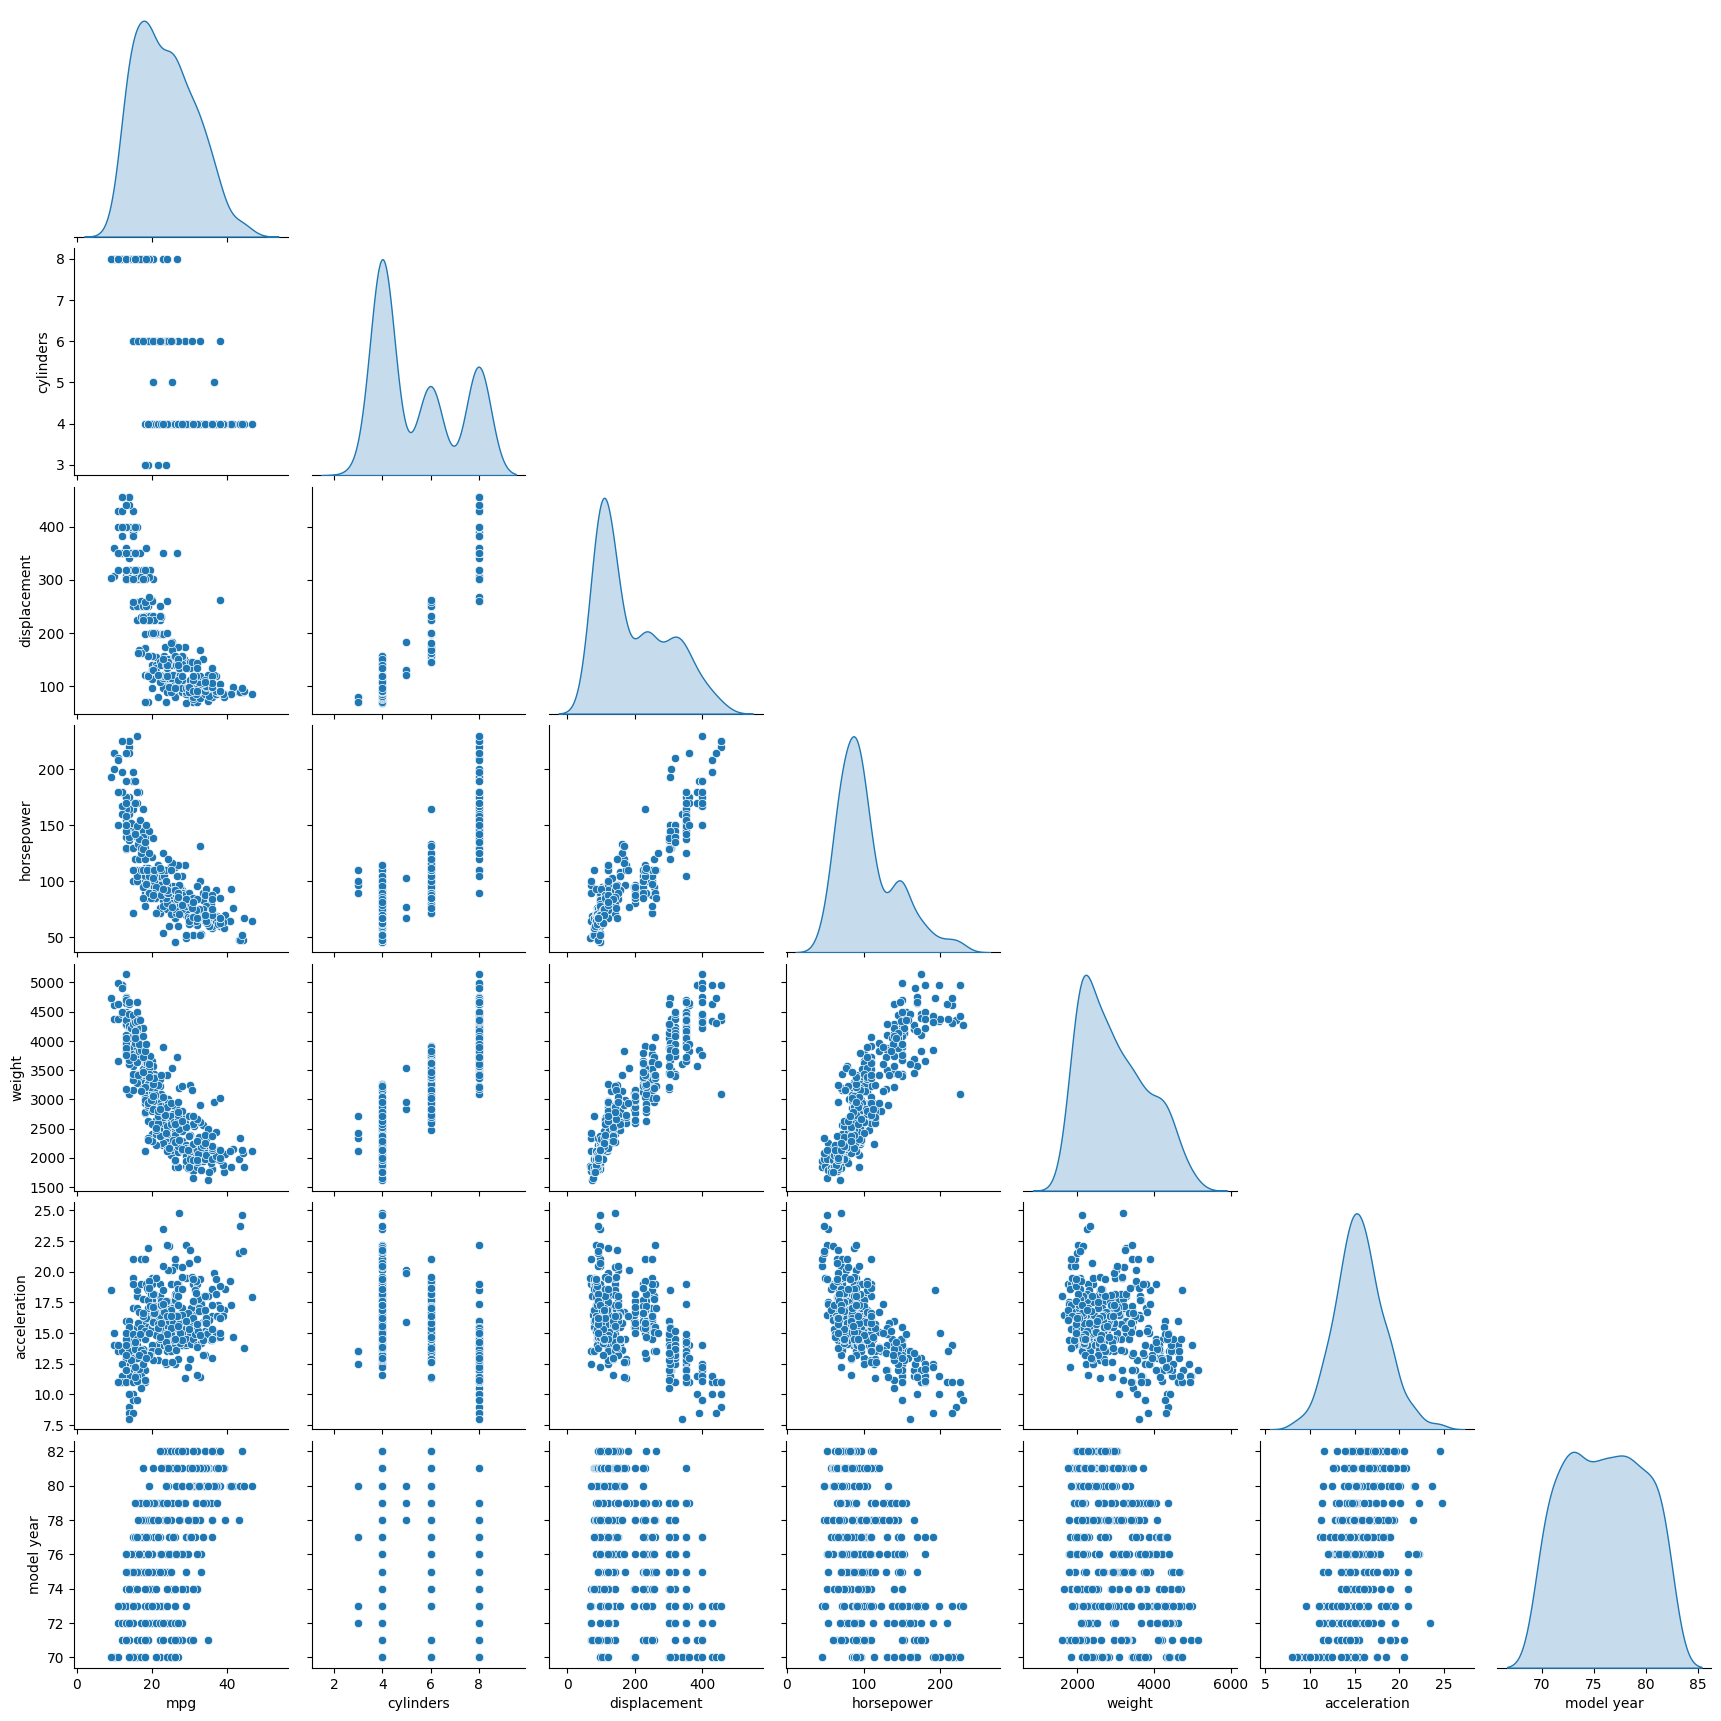

In [19]:
# BiVariate Plots
sns.pairplot(auto_attr, diag_kind='kde',corner=True);   # to plot density curve instead of histogram on the diag

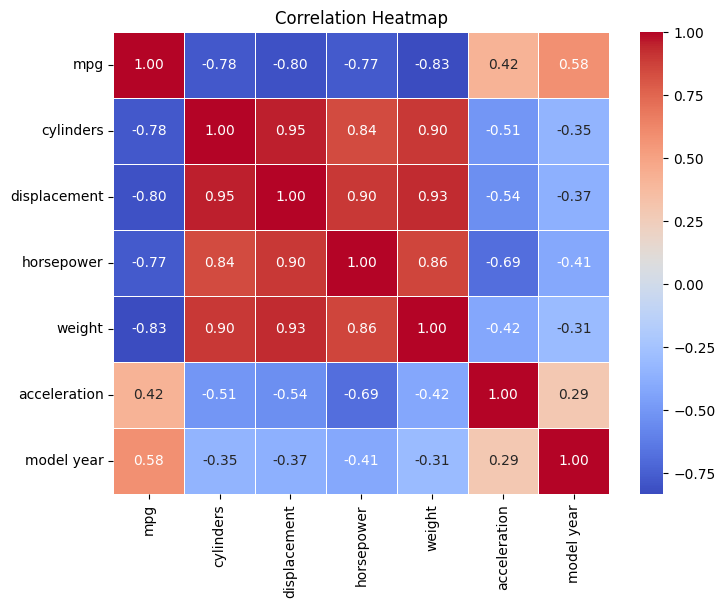

In [20]:
# heatmap to visualize correlation
plt.figure(figsize=(8, 6))
sns.heatmap(auto_attr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap');

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity


#### Split Data

In [21]:
# lets build our linear model

# independant variables
X = auto.drop(['mpg','Europe'], axis=1)

# the dependent variable
y = auto[['mpg']] # or y = auto.mpg

In [22]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#### Fit Linear Model

In [23]:
# Create a linear regression model
lm = LinearRegression()

# Fit the model on the training data
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Here are the coefficients for each variable and the intercept

`lm.coef_` and `lm.intercept_` these are objects of lm

In [24]:
# get the coefficients
for idx, col_name in enumerate(X_train.columns):
    print(f'The Coefficient for {col_name} is {lm.coef_[0][idx]}')

print()

# get the intercept
print(f'The intercept for our model is {lm.intercept_[0]}')

The Coefficient for cylinders is -0.3948079661648248
The Coefficient for displacement is 0.02894551076548742
The Coefficient for horsepower is -0.021752207723547176
The Coefficient for weight is -0.0073520320651473585
The Coefficient for acceleration is 0.06191936600761855
The Coefficient for model year is 0.8369338917645003
The Coefficient for America is -3.001283000918513
The Coefficient for Japanese is -0.6060179643247402

The intercept for our model is -18.283451116372124


The score (R^2) for in-sample and out of sample

In [25]:
# Evaluate the model
print(f'The R^2 score for our model for training set is {lm.score(X_train, y_train)}')
print(f'The R^2 score for our model for test set is {lm.score(X_test, y_test)}')

The R^2 score for our model for training set is 0.8141025501610559
The R^2 score for our model for test set is 0.843313513280883


#### Ploynomial Features - can capture curved relationships in the data when linear models are insufficient


In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True) # interaction_only=True means we will not have squared terms, only interaction terms
# This will create interaction terms between the features, but not squared terms

X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.9026446935642732


In [27]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.8668600518028435


In [28]:
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape) # you will see additional 29 variables

(278, 8)
(278, 37)


In [29]:
pd.DataFrame(X_train2, columns=poly.get_feature_names_out(X_train.columns))

,1,cylinders,displacement,horsepower,weight,acceleration,model year,America,Japanese,cylinders displacement,...,weight acceleration,weight model year,weight America,weight Japanese,acceleration model year,acceleration America,acceleration Japanese,model year America,model year Japanese,America Japanese
0,1.0,4.0,105.0,63.0,2215.0,14.9,81.0,1.0,0.0,420.0,...,33003.5,179415.0,2215.0,0.0,1206.9,14.9,0.0,81.0,0.0,0.0
1,1.0,4.0,97.0,54.0,2254.0,23.5,72.0,0.0,0.0,388.0,...,52969.0,162288.0,0.0,0.0,1692.0,0.0,0.0,0.0,0.0,0.0
2,1.0,4.0,121.0,112.0,2868.0,15.5,73.0,0.0,0.0,484.0,...,44454.0,209364.0,0.0,0.0,1131.5,0.0,0.0,0.0,0.0,0.0
3,1.0,8.0,400.0,150.0,3761.0,9.5,70.0,1.0,0.0,3200.0,...,35729.5,263270.0,3761.0,0.0,665.0,9.5,0.0,70.0,0.0,0.0
4,1.0,4.0,91.0,68.0,1985.0,16.0,81.0,0.0,1.0,364.0,...,31760.0,160785.0,0.0,1985.0,1296.0,0.0,16.0,0.0,81.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,1.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,0.0,560.0,...,43524.0,228780.0,2790.0,0.0,1279.2,15.6,0.0,82.0,0.0,0.0
274,1.0,4.0,140.0,88.0,2720.0,15.4,78.0,1.0,0.0,560.0,...,41888.0,212160.0,2720.0,0.0,1201.2,15.4,0.0,78.0,0.0,0.0
275,1.0,8.0,304.0,150.0,3892.0,12.5,72.0,1.0,0.0,2432.0,...,48650.0,280224.0,3892.0,0.0,900.0,12.5,0.0,72.0,0.0,0.0
276,1.0,4.0,97.0,75.0,2265.0,18.2,77.0,0.0,1.0,388.0,...,41223.0,174405.0,0.0,2265.0,1401.4,0.0,18.2,0.0,77.0,0.0


Polynomial Features (with only interaction terms) have improved the Out of sample R^2. However at the cost of increaing the number of variables significantly. 
